In [1]:
import os
import shutil

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Defining the path to the train folder
train_data_dir = 'C:/Users/smart/Documents/All Courses Assignments files first trial/Foundations of Machine Learning/train'  # Replace with the actual path to your train folder

# Getting the list of subfolders (classes) in the train folder
classes = os.listdir(train_data_dir)

# Creating a dictionary to store the number of images for each class
class_image_count = {}

# Iterating over each class and count the number of images
for class_name in classes:
    class_path = os.path.join(train_data_dir, class_name)
    image_count = len(os.listdir(class_path))
    class_image_count[class_name] = image_count

# Sorting the classes based on the number of images in descending order
sorted_classes = sorted(class_image_count.items(), key=lambda x: x[1], reverse=True)

# Selecting the top three classes
top_three_classes = [class_name for class_name, _ in sorted_classes[:3]]

# Printing the top three classes
print("Top Three Classes:", top_three_classes)


Top Three Classes: ['RUFOUS TREPE', 'HOUSE FINCH', 'D-ARNAUDS BARBET']


In [2]:
# Creating a new directory to store data for the top three classes
new_data_directory = 'C:/Users/smart/Documents/All Courses Assignments files first trial/Foundations of Machine Learning/top_three_classes'
os.makedirs(new_data_directory, exist_ok=True)

# Iterating through the top classes and copy relevant data
for class_name in top_three_classes:
    source_class_directory = os.path.join(train_data_dir, class_name)
    destination_class_directory = os.path.join(new_data_directory, class_name)
    shutil.copytree(source_class_directory, destination_class_directory)

Augmentation of Images of top three classes

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Defining the path to the directory with the top three classes
new_data_directory = 'C:/Users/smart/Documents/All Courses Assignments files first trial/Foundations of Machine Learning/top_three_classes'

# Setting up data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to [0,1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Flowing from directory with data augmentation
batch_size = 32
train_generator = datagen.flow_from_directory(
    new_data_directory,  # Using the new directory with top three classes
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 744 images belonging to 3 classes.


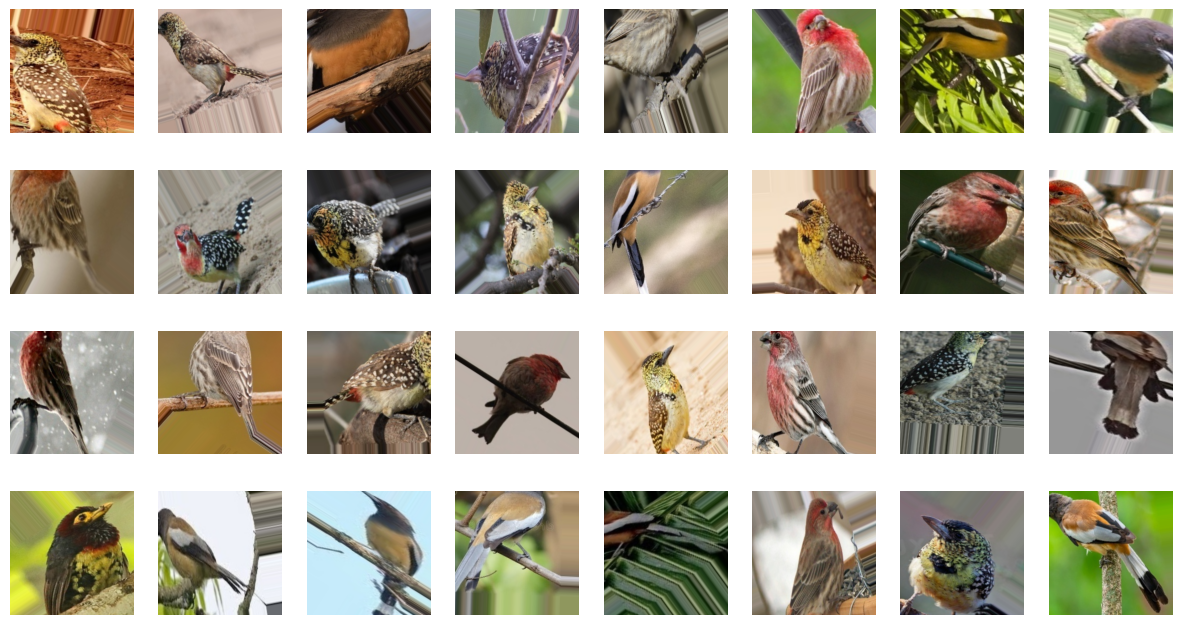

In [4]:
import matplotlib.pyplot as plt

# Getting a batch of augmented images
augmented_images, _ = train_generator.next()

# Displaying the augmented images
fig, axes = plt.subplots(4, 8, figsize=(15, 8))
axes = axes.flatten()

for img, ax in zip(augmented_images, axes):
    ax.imshow(img)
    ax.axis('off')

plt.show()


Found 744 images belonging to 3 classes.


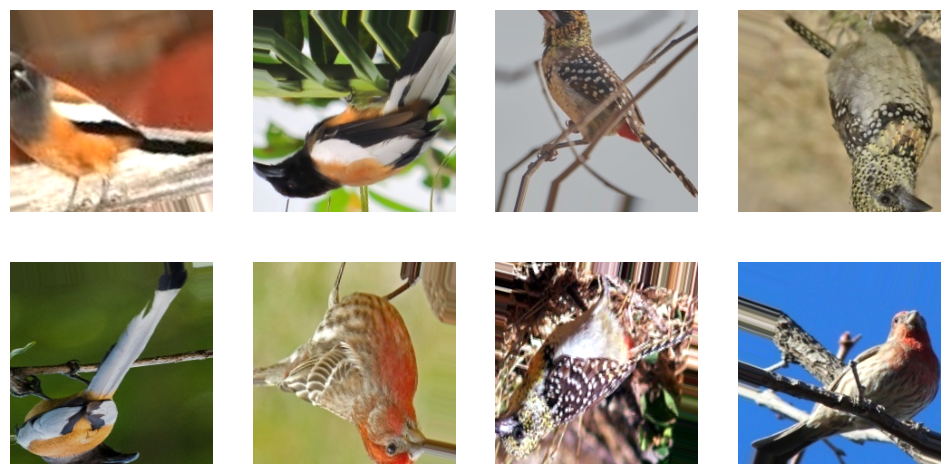

In [5]:
# Defining the path to the directory with the top three classes
new_data_directory = 'C:/Users/smart/Documents/All Courses Assignments files first trial/Foundations of Machine Learning/top_three_classes'

# Setting up data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to [0,1]
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Flowing from directory with data augmentation
batch_size = 8
train_generator = datagen.flow_from_directory(
    new_data_directory,  # Use the new directory with top three classes
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Getting a batch of augmented images
augmented_images, _ = train_generator.next()

# Displaying the augmented images
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for img, ax in zip(augmented_images, axes):
    ax.imshow(img)
    ax.axis('off')

plt.show()

Found 744 images belonging to 3 classes.


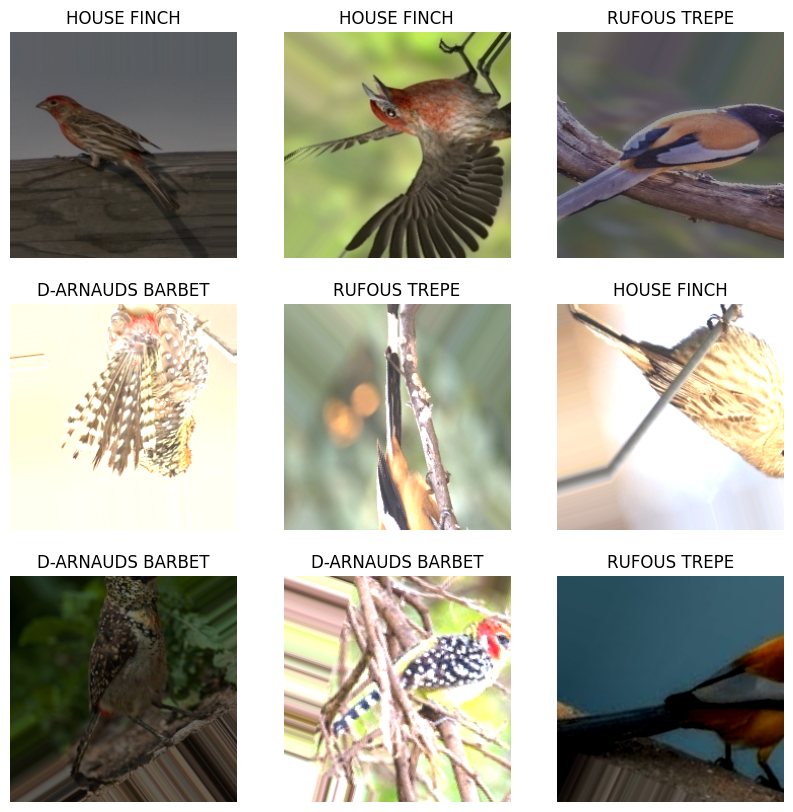

In [6]:

import numpy as np

# Defining the path to the directory with the top three classes
new_data_directory = 'C:/Users/smart/Documents/All Courses Assignments files first trial/Foundations of Machine Learning/top_three_classes'

# Setting up data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to [0,1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # New augmentation: vertical flip
    brightness_range=[0.5, 1.5],  # New augmentation: brightness adjustment
    channel_shift_range=50.0,  # New augmentation: channel shift
    featurewise_center=True,  # New augmentation: feature-wise centering
    featurewise_std_normalization=True  # New augmentation: feature-wise std normalization
)

# Flowing from directory with data augmentation
batch_size = 32
train_generator = datagen.flow_from_directory(
    new_data_directory,  # Use the new directory with top three classes
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Viewing the batches of augmented images generated
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis("off")
    plt.show()

# Generating augmented images and labels
augmented_images, augmented_labels = next(train_generator)

# Converting one-hot encoded labels to class names
class_labels = list(train_generator.class_indices.keys())
augmented_class_names = [class_labels[np.argmax(label)] for label in augmented_labels]

# Displaying augmented images
plot_images(augmented_images, augmented_class_names)


Found 744 images belonging to 3 classes.


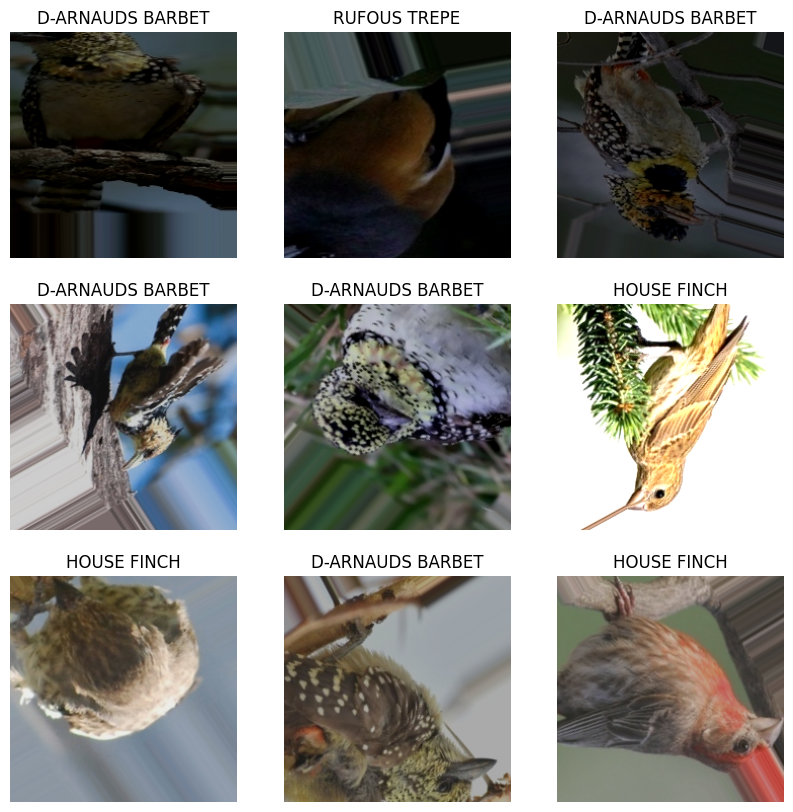

In [7]:
# Defining the path to the directory with the top three classes
new_data_directory = 'C:/Users/smart/Documents/All Courses Assignments files first trial/Foundations of Machine Learning/top_three_classes'

# Setting up data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to [0,1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # New augmentation: vertical flip
    brightness_range=[0.5, 1.5],  # New augmentation: brightness adjustment
    channel_shift_range=50.0,  # New augmentation: channel shift
    featurewise_center=True,  # New augmentation: feature-wise centering
    featurewise_std_normalization=True,  # New augmentation: feature-wise std normalization
    zca_whitening=True  # New augmentation: ZCA whitening
)

# Flowing from directory with data augmentation
batch_size = 32
train_generator = datagen.flow_from_directory(
    new_data_directory,  # Use the new directory with top three classes
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Viewing the batches of augmented images generated
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis("off")
    plt.show()

# Generating augmented images and labels
augmented_images, augmented_labels = next(train_generator)

# Converting one-hot encoded labels to class names
class_labels = list(train_generator.class_indices.keys())
augmented_class_names = [class_labels[np.argmax(label)] for label in augmented_labels]

# Displaying augmented images
plot_images(augmented_images, augmented_class_names)

Fine-tuning VG16

In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Defining the path to the directory with the top three classes
new_data_directory = 'C:/Users/smart/Documents/All Courses Assignments files first trial/Foundations of Machine Learning/top_three_classes'

# Setting up data augmentation parameters for fine-tuning - 2nd set
datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to [0,1]
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Creating a VGG16 model with pre-trained weights (do not include the top layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezing the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Building a custom model for fine-tuning
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))  # 3 classes

# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

# Creating data generators for training and validation using the augmented data
batch_size = 32
train_generator = datagen.flow_from_directory(
    new_data_directory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust the number of epochs as needed
    verbose=1
)

# Saving the model
model.save('fine_tuned_vgg16_set2.h5')


Found 744 images belonging to 3 classes.
Epoch 1/10
23/23 [==============================] - 120s 5s/step - loss: 1.0055 - accuracy: 0.6067
Epoch 2/10
23/23 [==============================] - 118s 5s/step - loss: 0.4598 - accuracy: 0.8287
Epoch 3/10
23/23 [==============================] - 116s 5s/step - loss: 0.3504 - accuracy: 0.8736
Epoch 4/10
23/23 [==============================] - 116s 5s/step - loss: 0.2602 - accuracy: 0.9101
Epoch 5/10
23/23 [==============================] - 116s 5s/step - loss: 0.2175 - accuracy: 0.9242
Epoch 6/10
23/23 [==============================] - 116s 5s/step - loss: 0.2127 - accuracy: 0.9171
Epoch 7/10
23/23 [==============================] - 116s 5s/step - loss: 0.2046 - accuracy: 0.9228
Epoch 8/10
23/23 [==============================] - 116s 5s/step - loss: 0.1875 - accuracy: 0.9326
Epoch 9/10
23/23 [==============================] - 116s 5s/step - loss: 0.1587 - accuracy: 0.9410
Epoch 10/10
23/23 [==============================] - 120s 5s/step - 

In [10]:


# Defining the path to the directory with the top three classes
new_data_directory = 'C:/Users/smart/Documents/All Courses Assignments files first trial/Foundations of Machine Learning/top_three_classes'

# Setting up data augmentation parameters for fine-tuning - 1st set
datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to [0,1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Creating a VGG16 model with pre-trained weights (do not include the top layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezing the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Building a custom model for fine-tuning
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))  # 3 classes

# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

# Creating data generators for training and validation using the augmented data
batch_size = 32
train_generator = datagen.flow_from_directory(
    new_data_directory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust the number of epochs as needed
    verbose=1
)

# Saving the model
model.save('fine_tuned_vgg16_set1.h5')


Found 744 images belonging to 3 classes.
Epoch 1/10
23/23 [==============================] - 117s 5s/step - loss: 1.0830 - accuracy: 0.6110
Epoch 2/10
23/23 [==============================] - 116s 5s/step - loss: 0.5028 - accuracy: 0.7963
Epoch 3/10
23/23 [==============================] - 116s 5s/step - loss: 0.3058 - accuracy: 0.8947
Epoch 4/10
23/23 [==============================] - 117s 5s/step - loss: 0.2971 - accuracy: 0.8890
Epoch 5/10
23/23 [==============================] - 117s 5s/step - loss: 0.3086 - accuracy: 0.8947
Epoch 6/10
23/23 [==============================] - 117s 5s/step - loss: 0.2480 - accuracy: 0.9115
Epoch 7/10
23/23 [==============================] - 117s 5s/step - loss: 0.1884 - accuracy: 0.9368
Epoch 8/10
23/23 [==============================] - 117s 5s/step - loss: 0.2111 - accuracy: 0.9242
Epoch 9/10
23/23 [==============================] - 117s 5s/step - loss: 0.2120 - accuracy: 0.9228
Epoch 10/10
23/23 [==============================] - 117s 5s/step - 

In [11]:


# Defining the path to the directory with the top three classes
new_data_directory = 'C:/Users/smart/Documents/All Courses Assignments files first trial/Foundations of Machine Learning/top_three_classes'

# Setting up data augmentation parameters for fine-tuning - 3rd set
datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to [0,1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # New augmentation: vertical flip
    brightness_range=[0.5, 1.5],  # New augmentation: brightness adjustment
    channel_shift_range=50.0,  # New augmentation: channel shift
    featurewise_center=True,  # New augmentation: feature-wise centering
    featurewise_std_normalization=True  # New augmentation: feature-wise std normalization
)

# Creating a VGG16 model with pre-trained weights (do not include the top layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezing the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Building a custom model for fine-tuning
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))  # 3 classes

# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

# Creating data generators for training and validation using the augmented data
batch_size = 32
train_generator = datagen.flow_from_directory(
    new_data_directory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust the number of epochs as needed
    verbose=1
)

# Saving the model
model.save('fine_tuned_vgg16_set3.h5')


Found 744 images belonging to 3 classes.
Epoch 1/10
23/23 [==============================] - 119s 5s/step - loss: 1.4018 - accuracy: 0.5070
Epoch 2/10
23/23 [==============================] - 118s 5s/step - loss: 0.6637 - accuracy: 0.7247
Epoch 3/10
23/23 [==============================] - 191s 8s/step - loss: 0.5408 - accuracy: 0.7781
Epoch 4/10
23/23 [==============================] - 229s 10s/step - loss: 0.4511 - accuracy: 0.8385
Epoch 5/10
23/23 [==============================] - 234s 10s/step - loss: 0.4089 - accuracy: 0.8469
Epoch 6/10
23/23 [==============================] - 231s 10s/step - loss: 0.3868 - accuracy: 0.8638
Epoch 7/10
23/23 [==============================] - 228s 10s/step - loss: 0.3395 - accuracy: 0.8596
Epoch 8/10
23/23 [==============================] - 227s 10s/step - loss: 0.3210 - accuracy: 0.8862
Epoch 9/10
23/23 [==============================] - 228s 10s/step - loss: 0.3698 - accuracy: 0.8553
Epoch 10/10
23/23 [==============================] - 227s 10s/

In [12]:
# Defining the path to the directory with the top three classes
new_data_directory = 'C:/Users/smart/Documents/All Courses Assignments files first trial/Foundations of Machine Learning/top_three_classes'

# Setting up data augmentation parameters for fine-tuning - 4th set
datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to [0,1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # New augmentation: vertical flip
    brightness_range=[0.5, 1.5],  # New augmentation: brightness adjustment
    channel_shift_range=50.0,  # New augmentation: channel shift
    featurewise_center=True,  # New augmentation: feature-wise centering
    featurewise_std_normalization=True,  # New augmentation: feature-wise std normalization
    zca_whitening=True  # New augmentation: ZCA whitening
)

# Creating a VGG16 model with pre-trained weights (do not include the top layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezing the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Building a custom model for fine-tuning
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))  # 3 classes

# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

# Creating data generators for training and validation using the augmented data
batch_size = 32
train_generator = datagen.flow_from_directory(
    new_data_directory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  # Adjust the number of epochs as needed
    verbose=1
)

# Saving the model
model.save('fine_tuned_vgg16_set4.h5')


Found 744 images belonging to 3 classes.
Epoch 1/10
23/23 [==============================] - 232s 10s/step - loss: 1.2039 - accuracy: 0.5351
Epoch 2/10
23/23 [==============================] - 233s 10s/step - loss: 0.6993 - accuracy: 0.7121
Epoch 3/10
23/23 [==============================] - 230s 10s/step - loss: 0.5099 - accuracy: 0.8202
Epoch 4/10
23/23 [==============================] - 232s 10s/step - loss: 0.4458 - accuracy: 0.8385
Epoch 5/10
23/23 [==============================] - 234s 10s/step - loss: 0.3961 - accuracy: 0.8469
Epoch 6/10
23/23 [==============================] - 232s 10s/step - loss: 0.3659 - accuracy: 0.8596
Epoch 7/10
23/23 [==============================] - 226s 10s/step - loss: 0.3681 - accuracy: 0.8638
Epoch 8/10
23/23 [==============================] - 225s 10s/step - loss: 0.3394 - accuracy: 0.8792
Epoch 9/10
23/23 [==============================] - 238s 10s/step - loss: 0.2990 - accuracy: 0.8791
Epoch 10/10
23/23 [==============================] - 233s 1

In [13]:
# Defining the path to the test folder
test_data_dir = 'C:/Users/smart/Documents/All Courses Assignments files first trial/Foundations of Machine Learning/test'  # Replace with the actual path to your test folder

# Specifying the specific classes you want to include
selected_classes = ['RUFOUS TREPE', 'HOUSE FINCH', 'D-ARNAUDS BARBET']

# Creating a new directory in the test set to store data for the selected classes
new_test_data_directory = 'C:/Users/smart/Documents/All Courses Assignments files first trial/Foundations of Machine Learning/selected_test_classes'
os.makedirs(new_test_data_directory, exist_ok=True)

# Iterating through all folders in the test set
for class_name in os.listdir(test_data_dir):
    if class_name in selected_classes:
        source_class_directory = os.path.join(test_data_dir, class_name)
        destination_class_directory = os.path.join(new_test_data_directory, class_name)
        shutil.copytree(source_class_directory, destination_class_directory)

Found 15 images belonging to 3 classes.
1/1 [==============================] - 5s 5s/step - loss: 0.0078 - accuracy: 1.0000
Test Accuracy: 1.0000
1/1 [==============================] - 5s 5s/step
Confusion Matrix:
 [[5 0 0]
 [0 5 0]
 [0 0 5]]
Classification Report:
                   precision    recall  f1-score   support

D-ARNAUDS BARBET       1.00      1.00      1.00         5
     HOUSE FINCH       1.00      1.00      1.00         5
    RUFOUS TREPE       1.00      1.00      1.00         5

        accuracy                           1.00        15
       macro avg       1.00      1.00      1.00        15
    weighted avg       1.00      1.00      1.00        15



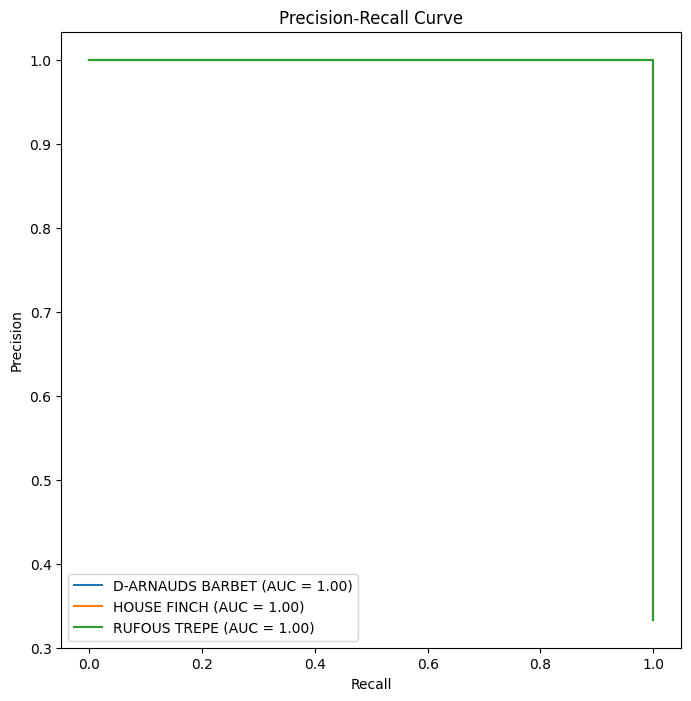

In [23]:
# Ignoring all warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.preprocessing import label_binarize

# Loading the trained model
model = load_model('fine_tuned_vgg16_set2.h5')

# Defining the path to the directory with the top three classes in the test set
new_test_data_directory = 'C:/Users/smart/Documents/All Courses Assignments files first trial/Foundations of Machine Learning/selected_test_classes'

# Setting up data generator for testing
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
test_generator = test_datagen.flow_from_directory(
    new_test_data_directory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set to False to maintain order for evaluation
)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Making predictions on the test set
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Getting true labels
true_labels = test_generator.classes

# Generating a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

# Generating a classification report
class_labels = list(test_generator.class_indices.keys())
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_labels))

# Plotting precision-recall curve for each class
precision = dict()
recall = dict()
pr_auc = dict()

true_labels_bin = label_binarize(true_labels, classes=np.arange(len(class_labels)))

for i in range(len(class_labels)):
    precision[i], recall[i], _ = precision_recall_curve(true_labels_bin[:, i], predictions[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plotting the precision-recall curves
plt.figure(figsize=(8, 8))
for i in range(len(class_labels)):
    plt.plot(recall[i], precision[i], label=f'{class_labels[i]} (AUC = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Found 15 images belonging to 3 classes.
1/1 [==============================] - 5s 5s/step - loss: 0.0041 - accuracy: 1.0000
Test Accuracy: 1.0000
1/1 [==============================] - 6s 6s/step
Confusion Matrix:
 [[5 0 0]
 [0 5 0]
 [0 0 5]]
Classification Report:
                   precision    recall  f1-score   support

D-ARNAUDS BARBET       1.00      1.00      1.00         5
     HOUSE FINCH       1.00      1.00      1.00         5
    RUFOUS TREPE       1.00      1.00      1.00         5

        accuracy                           1.00        15
       macro avg       1.00      1.00      1.00        15
    weighted avg       1.00      1.00      1.00        15



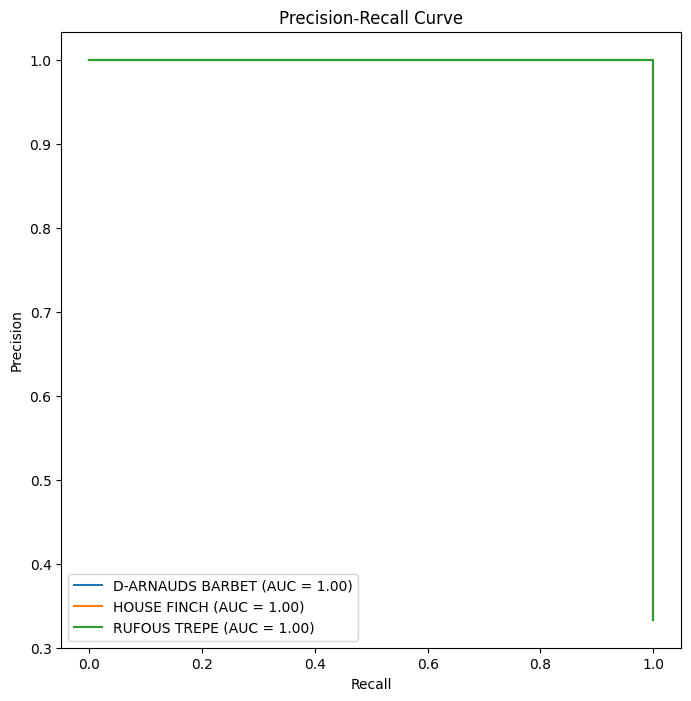

In [25]:

# Ignoring all warnings
warnings.filterwarnings("ignore")

# Loading the trained model
model = load_model('fine_tuned_vgg16_set1.h5')

# Defin the path to the directory with the top three classes in the test set
new_test_ingdata_directory = 'C:/Users/smart/Documents/All Courses Assignments files first trial/Foundations of Machine Learning/selected_test_classes'

# Setting up data generator for testing
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
test_generator = test_datagen.flow_from_directory(
    new_test_data_directory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set to False to maintain order for evaluation
)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Making predictions on the test set
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Getting true labels
true_labels = test_generator.classes

# Generating a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

# Generating a classification report
class_labels = list(test_generator.class_indices.keys())
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_labels))

# Plotting precision-recall curve for each class
precision = dict()
recall = dict()
pr_auc = dict()

true_labels_bin = label_binarize(true_labels, classes=np.arange(len(class_labels)))

for i in range(len(class_labels)):
    precision[i], recall[i], _ = precision_recall_curve(true_labels_bin[:, i], predictions[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plotting the precision-recall curves
plt.figure(figsize=(8, 8))
for i in range(len(class_labels)):
    plt.plot(recall[i], precision[i], label=f'{class_labels[i]} (AUC = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Found 15 images belonging to 3 classes.
1/1 [==============================] - 5s 5s/step - loss: 0.0051 - accuracy: 1.0000
Test Accuracy: 1.0000
1/1 [==============================] - 5s 5s/step
Confusion Matrix:
 [[5 0 0]
 [0 5 0]
 [0 0 5]]
Classification Report:
                   precision    recall  f1-score   support

D-ARNAUDS BARBET       1.00      1.00      1.00         5
     HOUSE FINCH       1.00      1.00      1.00         5
    RUFOUS TREPE       1.00      1.00      1.00         5

        accuracy                           1.00        15
       macro avg       1.00      1.00      1.00        15
    weighted avg       1.00      1.00      1.00        15



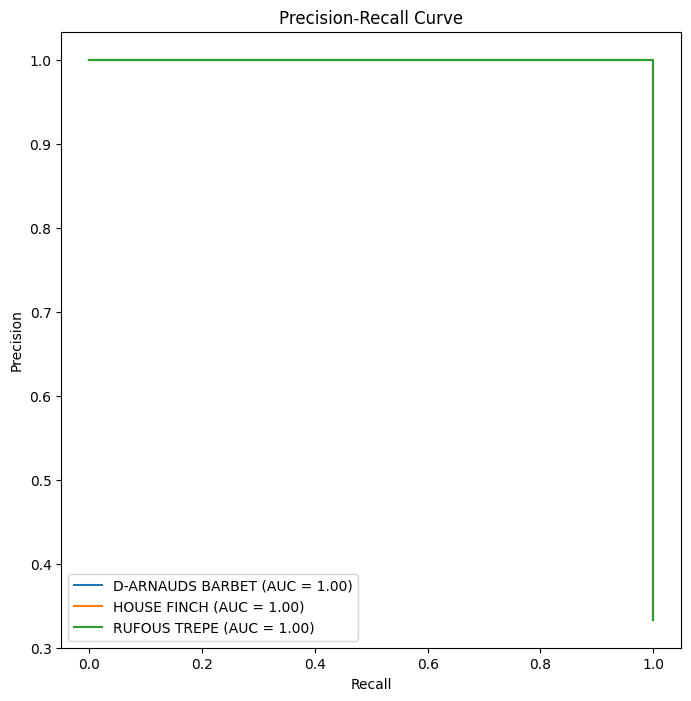

In [26]:
# Ignoring all warnings
warnings.filterwarnings("ignore")

# Loading the trained model
model = load_model('fine_tuned_vgg16_set3.h5')

# Defining the path to the directory with the top three classes in the test set
new_test_data_directory = 'C:/Users/smart/Documents/All Courses Assignments files first trial/Foundations of Machine Learning/selected_test_classes'

# Setting up data generator for testing
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
test_generator = test_datagen.flow_from_directory(
    new_test_data_directory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set to False to maintain order for evaluation
)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Making predictions on the test set
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Getting true labels
true_labels = test_generator.classes

# Generating a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

# Generating a classification report
class_labels = list(test_generator.class_indices.keys())
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_labels))

# Plotting precision-recall curve for each class
precision = dict()
recall = dict()
pr_auc = dict()

true_labels_bin = label_binarize(true_labels, classes=np.arange(len(class_labels)))

for i in range(len(class_labels)):
    precision[i], recall[i], _ = precision_recall_curve(true_labels_bin[:, i], predictions[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plotting the precision-recall curves
plt.figure(figsize=(8, 8))
for i in range(len(class_labels)):
    plt.plot(recall[i], precision[i], label=f'{class_labels[i]} (AUC = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Found 15 images belonging to 3 classes.
1/1 [==============================] - 5s 5s/step - loss: 0.0066 - accuracy: 1.0000
Test Accuracy: 1.0000
1/1 [==============================] - 5s 5s/step
Confusion Matrix:
 [[5 0 0]
 [0 5 0]
 [0 0 5]]
Classification Report:
                   precision    recall  f1-score   support

D-ARNAUDS BARBET       1.00      1.00      1.00         5
     HOUSE FINCH       1.00      1.00      1.00         5
    RUFOUS TREPE       1.00      1.00      1.00         5

        accuracy                           1.00        15
       macro avg       1.00      1.00      1.00        15
    weighted avg       1.00      1.00      1.00        15



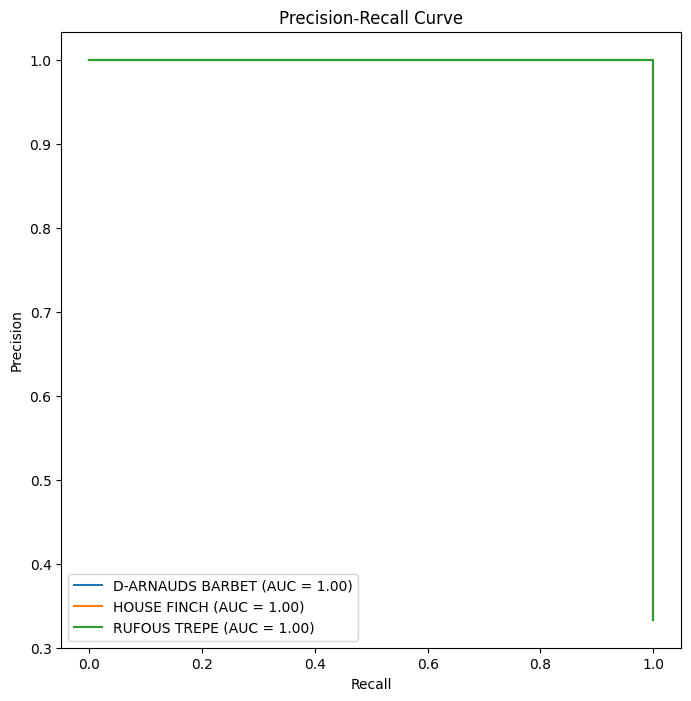

In [27]:
# Ignoring all warnings
warnings.filterwarnings("ignore")

# Loading the trained model
model = load_model('fine_tuned_vgg16_set4.h5')

# Defining the path to the directory with the top three classes in the test set
new_test_data_directory = 'C:/Users/smart/Documents/All Courses Assignments files first trial/Foundations of Machine Learning/selected_test_classes'

# Setting up data generator for testing
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
test_generator = test_datagen.flow_from_directory(
    new_test_data_directory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set to False to maintain order for evaluation
)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Making predictions on the test set
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Getting true labels
true_labels = test_generator.classes

# Generating a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

# Generating a classification report
class_labels = list(test_generator.class_indices.keys())
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_labels))

# Plotting precision-recall curve for each class
precision = dict()
recall = dict()
pr_auc = dict()

true_labels_bin = label_binarize(true_labels, classes=np.arange(len(class_labels)))

for i in range(len(class_labels)):
    precision[i], recall[i], _ = precision_recall_curve(true_labels_bin[:, i], predictions[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plotting the precision-recall curves
plt.figure(figsize=(8, 8))
for i in range(len(class_labels)):
    plt.plot(recall[i], precision[i], label=f'{class_labels[i]} (AUC = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
